In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

np.random.seed(0)

# Linear Algebra - Recap

### Matrix Transpose

The transpose of a matrix is an operator which flips a matrix over its diagonal, that is it switches the row and column indices of the matrix by producing another matrix denoted as $A^T$. In practice, to obtain $A^T$ from $A$:
- write the rows of $A$ as the columns of $A^T$, or,
- write the columns of $A$ as the rows of $A^T$.

$\mathbf{A} = \left[\begin{array}{ll}
1 & 2 \\
3 & 4 \\
5 & 6
\end{array}\right], \quad \mathbf{A}^{\mathrm{T}}=\left[\begin{array}{lll}
1 & 3 & 5 \\
2 & 4 & 6
\end{array}\right]$

In [2]:
# Define the A matrix
A = np.arange(1,7).reshape(3,2)
# Compute its transpose
At = A.T
At

array([[1, 3, 5],
       [2, 4, 6]])

If the array has multiple dimensions, the transpose is defined by rearranging the axis in the opposite order. Note that this is also the default behaviour with two dimentions. A $2 \times 3 \times 4$ matrix becomes a $4 \times 3 \times 2$:

In [3]:
# Define a 3-dimensional 2x3x4 matrix with 
# integer values from 1 to 25
A = np.arange(1, 25).reshape(2,3,4)
# Compute the transpose
A.T.shape

(4, 3, 2)

### Matrix Multiplication

If $A$ is an $m \times n$ matrix and $B$ is an $n \times p$ matrix, the matrix product $C = AB$ is defined to be the $m \times p$ matrix such that $c_{i j}=a_{i 1} b_{1 j}+a_{i 2} b_{2 j}+\cdots+a_{i n} b_{n j}=\sum_{k=1}^{n} a_{i k} b_{k j}$



$\mathbf{A}=\left(\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1 n} \\
a_{21} & a_{22} & \cdots & a_{2 n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m 1} & a_{m 2} & \cdots & a_{m n}
\end{array}\right),
\quad \mathbf{B}=\left(\begin{array}{cccc}
b_{11} & b_{12} & \cdots & b_{1 p} \\
b_{21} & b_{22} & \cdots & b_{2 p} \\
\vdots & \vdots & \ddots & \vdots \\
b_{n 1} & b_{n 2} & \cdots & b_{n p}
\end{array}\right)$

$\mathbf{C}=\mathbf{A}\mathbf{B}=\left(\begin{array}{cccc}
a_{11} b_{11}+\cdots+a_{1 n} b_{n 1} & a_{11} b_{12}+\cdots+a_{1 n} b_{n 2} & \cdots & a_{11} b_{1 p}+\cdots+a_{1 n} b_{n p} \\
a_{21} b_{11}+\cdots+a_{2 n} b_{n 1} & a_{21} b_{12}+\cdots+a_{2 n} b_{n 2} & \cdots & a_{21} b_{1 p}+\cdots+a_{2 n} b_{n p} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m 1} b_{11}+\cdots+a_{m n} b_{n 1} & a_{m 1} b_{12}+\cdots+a_{m n} b_{n 2} & \cdots & a_{m 1} b_{1 p}+\cdots+a_{m n} b_{n p}
\end{array}\right)$

In [4]:
# Define a 3x2 matrix A with values
# from 0 to 5
A = np.arange(6).reshape(3,2)
# Define a 2x3 matrix B with values
# from 4 to 10
B = np.arange(4, 10).reshape(2,3)
I = np.eye(3,3)
A, B, I

(array([[0, 1],
        [2, 3],
        [4, 5]]),
 array([[4, 5, 6],
        [7, 8, 9]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [5]:
# Compute A*B ([3,2] * [2,3]), does this give error?
print("AB = ", A@B)
# Compute B*A ([2,3] * [3,2]), does this give error?
print("BA = ", B@A)
# Compute B*I ([2,3] * [3,3]), does this give error?
print("BI = ", B@I)
# Compute A*I ([3,2] * [3,3]), does this give error?
# print("BI = ", A@I)

AB =  [[ 7  8  9]
 [29 34 39]
 [51 60 69]]
BA =  [[34 49]
 [52 76]]
BI =  [[4. 5. 6.]
 [7. 8. 9.]]


In [6]:
# Compute product between vector and matrix
v = np.array([1,2,3])
print("v", v)
print("A", A)
print("v @ A", v@A)

# Can we perform A @ v?
# print("A @ v", A@v)

# Can we perform v @ v?
print("v @ v", v@v)

v [1 2 3]
A [[0 1]
 [2 3]
 [4 5]]
v @ A [16 22]
v @ v 14


### Matrix Inverse

In linear algebra, an **n-by-n square matrix** $A$ is called **invertible** (also nonsingular or nondegenerate) if there exists an n-by-n square matrix $B$ such that

$\mathbf{AB} =\mathbf{BA} =\mathbf{I}_{n}, \quad \mathbf{AB} =\mathbf{BA} =\mathbf{I}_{n}$

where $I_n$ denotes the n-by-n identity matrix and the multiplication used is ordinary matrix multiplication. If this is the case, then the matrix $B$ is uniquely determined by $A$ and is called the inverse of $A$, denoted by $A^{−1}$. 

Note, the identity matrix is invertible and equal to itself. $I_n^{-1} = I_n$

In [7]:
A = np.array([[-1, 3/2], [1, -1]])
A
# Compute the inverse
B = np.linalg.inv(A)
B

# Check it's shape
B.shape
# Check the properties
A@B
B@A

# Compute the inverse of the identity matrix
np.linalg.inv(np.eye(3,3))

# Compute the inverse of a rectangular matrix, is it possible?
# np.linalg.inv(np.random.randn(3,2))

array([[-1. ,  1.5],
       [ 1. , -1. ]])

array([[2., 3.],
       [2., 2.]])

(2, 2)

array([[1., 0.],
       [0., 1.]])

array([[1., 0.],
       [0., 1.]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# An Example - The Advertising dataset

Suppose that we are statistical consultants hired by a client to provide advice on how to improve sales of a particular product. The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

It is not possible for our client to directly increase sales of the product. On the other hand, they can control the advertising expenditure in each of the three media. Therefore, if we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales.

**In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.**

In [8]:
# Read the data and creates a pandas DataFrame
adv_data = pd.read_csv("data/Advertising.csv")
# Print the first few raws of the dataset
print(adv_data.head())
# Remove the first column (ID)
adv_data = adv_data[['TV', 'Radio', 'Newspaper', 'Sales']]
print(adv_data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


<AxesSubplot:xlabel='TV', ylabel='Sales'>

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

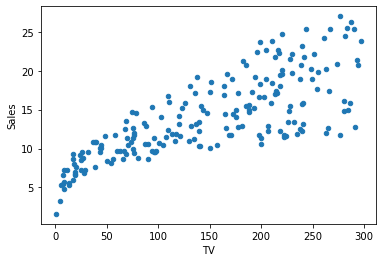

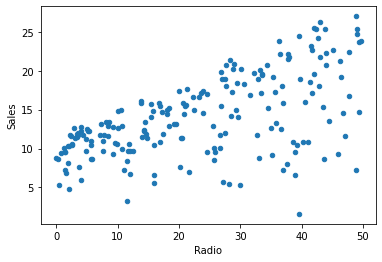

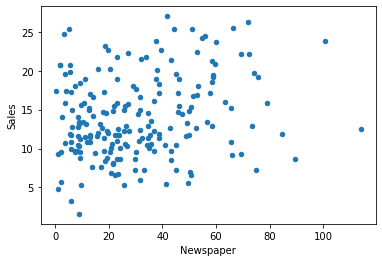

In [9]:
# Plot TV vs Sales
adv_data.plot.scatter('TV', 'Sales')
# Plot Radio vs Sales
adv_data.plot.scatter('Radio', 'Sales')
# Plot Newspaper vs Sales
adv_data.plot.scatter('Newspaper', 'Sales')

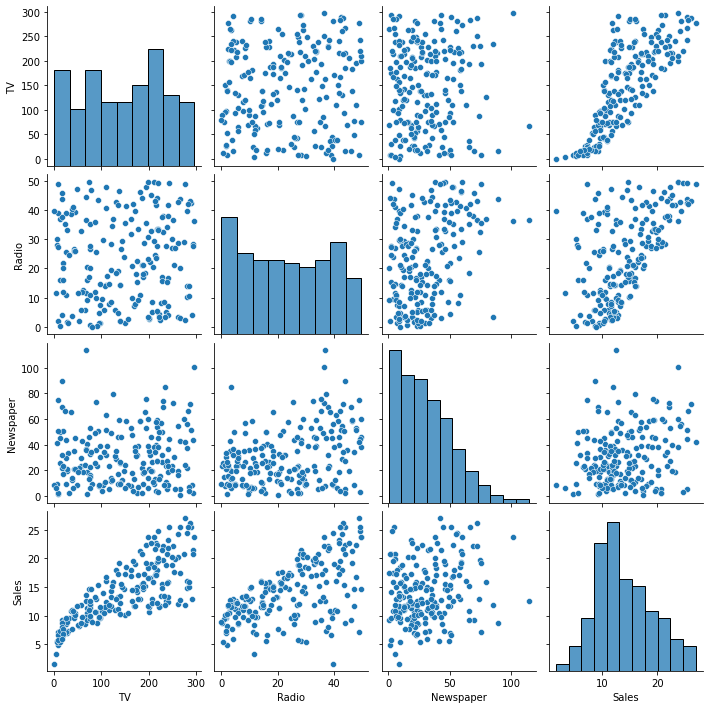

In [10]:
# Plot a pair plot showing each variable vs. every other
# using seaborn pairplot utility
sns.pairplot(adv_data, height=2.5)

# Simple Linear Regression and Feature Selection - Recap

Linear Regression assumes that there is approximately a linear relationship between $X$ and $Y$, where $X$ is the set of features (or attributes) of each sample, and $Y$ is the variable (or the variables) we want to predict.

Mathematically we can write:  $Y \approx \beta_0 + \beta_1 X$

For example, X may represent TV advertising and Y may represent sales. We can therefore define our model of the data as $sales \approx \beta_0 + \beta_1 TV$. Regressing sales onto TV means to find the parameters $\beta_0$ and $\beta_1$ that better describe the data based on some goodness measure. That is to find a _slope_ and an _intercept_ such that the resulting line is as close as possible to the data points.

Once we have used our training data to produce our estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ for the model coefficients, we can predict future sales based on a particular value of TV advertising.

### Least Squares

The most common method to find a solution for the linear regression problem is the least squares algorithm. 

Let $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i$ be the model prediction (i.e., the predicted sale) given a certain value of TV market $x_i$.

$e_i = y_i - \hat{y_i}$ is the residual error, that is the difference between the actual value $y_i$ and the predicted one $\hat{y_i}$.

Least squares finds a solution that minimizes the residual sum of squares of all training data, RSS.

$RSS = e_1^2 + e_2^2 + \dots + e_N^2 = \sum_i (y_i - \hat{y_i})^2 = \sum_{i=1}^N (y_i - \hat{\beta_0} - \hat{\beta_1}x_i)^2$

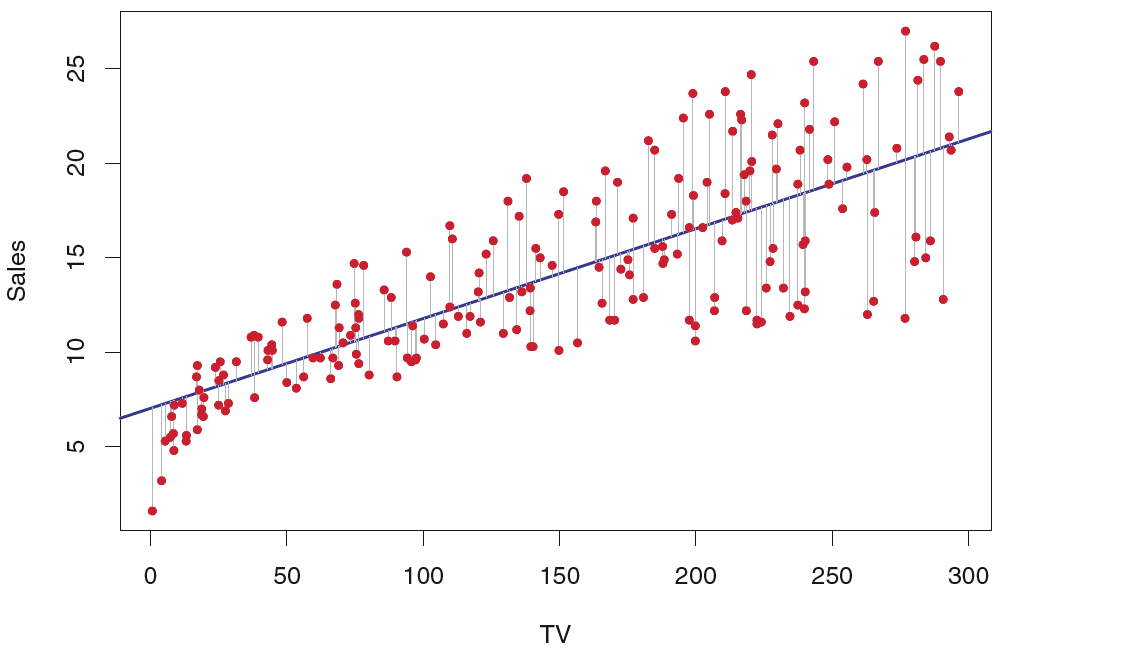

### Least Squares solution

We can compute the partial derivatives of RSS with respect to the model parameters $\hat{\beta_0}$ and $\hat{\beta_1}$ and equate them to 0. If we then solve for the model parameters, we will find the minimum/maximum of the RSS function. In principle, we may have to check if the value for the parameters we just computed is actually a minimum by computing the second order derivative, however, we know that the RSS function is **globally convex**, meaning that there exist a single stationary point which is a minimum! Therefore, the value $\hat{\beta_0}$ and $\hat{\beta_1}$ are those that **minimize** the RSS for all training points.

$\hat{\beta}_{1}=\frac{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)\left(y_{i}-\overline{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}} \quad\quad$
 $\hat{\beta}_{0}=\overline{y}-\hat{\beta}_{1} \overline{x}$

### Least Squares solution of $sales \approx \beta_0 + \beta_1 TV$

In [11]:
# Select the features (i.e., X)
X = adv_data['TV']
# Select the corrsponding target value (i.e., y)
y = adv_data['Sales']
print(X.shape, y.shape)

(200,) (200,)


In [12]:
def least_squares(X, y):
    # Compute the means
    X_mean = X.mean()
    y_mean = y.mean()
    # Compute \hat{\beta_1}
    beta_hat_1 = ((X-X_mean) * (y-y_mean)).sum() / ((X-X_mean)**2).sum()
    # Compute \hat{\beta_0}
    beta_hat_0 = y_mean - beta_hat_1 * X_mean
    return beta_hat_0, beta_hat_1

beta_hat_0, beta_hat_1 = least_squares(X, y)
print("Estimates: beta0 = {}, beta1 = {}".format(beta_hat_0, beta_hat_1))

# Compute the RSS
squared_residuals = (y - beta_hat_0 - beta_hat_1 * X)**2
RSS = squared_residuals.sum()

print("RSS = {}".format(RSS))

Estimates: beta0 = 7.032593549127698, beta1 = 0.047536640433019736
RSS = 2102.5305831313512


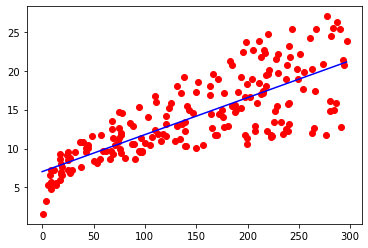

In [13]:
# Plot the solution using matplotlib
# First plot the points
plt.scatter(X, y, color='r')
# Then plot the line
# We select two points to connect (x1=0, y1=beta0) 
# and (x2=X.max(), y2=beta0 + x2*beta1)
x1 = 0
y1 = beta_hat_0
x2 = X.max()
y2 = beta_hat_0 + x2 * beta_hat_1
plt.plot([x1, x2], [y1, y2], color='b')


### Standard error: a measure of the accuracy of the coefficient estimates

We can compute the accuracy of an estimator by computing its **variance** or **standard error**. It tells us the average distance between the estimate and the actual value.

$\operatorname{SE}\left(\hat{\beta}_{0}\right)^{2}=\sigma^{2}\left[\frac{1}{n}+\frac{\overline{x}^{2}}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}}\right]
\quad\quad
\operatorname{SE}\left(\hat{\beta}_{1}\right)^{2}=\frac{\sigma^{2}}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}}
\quad\quad
\sigma^2= Var(\epsilon) \approx RSE^2$

Notice that the estimate for $\beta_1$ is more precise as the data are more spread out (denominator), i.e., the $x_i$ are more distant from the mean. Intuitively, this means that if the data cover a larger interval of the x-axis, we have more leverage to estimate the slope.

The variance of the error $\sigma^2= Var(\epsilon)$ is potentially unknown. However, we can compute an astimate from data called **residual standard error**, $\mathrm{RSE}=\sqrt{\mathrm{RSS} /(n-2)}$.

In [14]:
# Compute the standard error of \beta_0 and \beta_1
n = X.shape[0]
X_mean = X.mean()

RSS = ((y - beta_hat_0 - beta_hat_1 * X)**2).sum()
RSE2 = RSS / (n-2)
print("RSE =", RSE2)

se2_beta_0 = RSE2 * (1.0/n + (X_mean**2) / ((X-X_mean)**2).sum())
se2_beta_1 = RSE2 / ((X-X_mean)**2).sum()

print("SE(beta_0)^2 = {} \nSE(beta_1)^2 = {}".format(se2_beta_0, se2_beta_1))

RSE = 10.618841328946218
SE(beta_0)^2 = 0.209620157958264 
SE(beta_1)^2 = 7.2393670390241845e-06


The standard error for the $\beta_1$ parameter is actually very small, so we expect the model to be quite accurate on predicting the slope.

### Confidence intervals for the parameters

The standard errors can be used to compute __confidence intervals__ and __hypothesis tests__ for variables correlations.
In particular, we know that the value $t=\frac{\hat{\beta}_{i}-\beta_i}{\operatorname{SE}(\hat{\beta}_{1})}$ *is distributed as a **t-Student** of paramenters $deg=n−p$, where $n$ is the number of observations, and $p$ is the number of parameters used during regression*. The value $deg=n−p$ is usually defined **degree**, or normality value (since as we increase the degree, the distribution tends to the normal distribution).


We start by writing a probability, asking within which are the values of the interval that make this probability equal to a certain fixed valie $1 - \alpha$. We do this in terms of the t-Student statistics, and not directly w.r.t. the actual estimator for which we want to compute the interval since this allows later on to compute those interval values easier. We then reformulate the probability in terms of the estimator an obtain the actual $1-\alpha$ confidence interval we were looking for.

$P\left( -q_{\frac{\alpha}{2}} \leq \frac{\hat{\beta_i} - \beta_i}{SE(\hat{\beta_i})} \leq +q_{\frac{\alpha}{2}}\right) = 1 - \alpha$, 
$\quad P\left( \hat{\beta_i}-q_{\frac{\alpha}{2}} SE(\hat{\beta_i}) \leq \beta_i \leq \hat{\beta_i} +q_{\frac{\alpha}{2}} SE(\hat{\beta_i}) \right) = 1 - \alpha$, $\quad$or
$\quad \left[\hat{\beta_i} - q_{\frac{\alpha}{2}} SE(\beta_i), \hat{\beta_i} + q_{\frac{\alpha}{2}} SE(\beta_i)\right]$

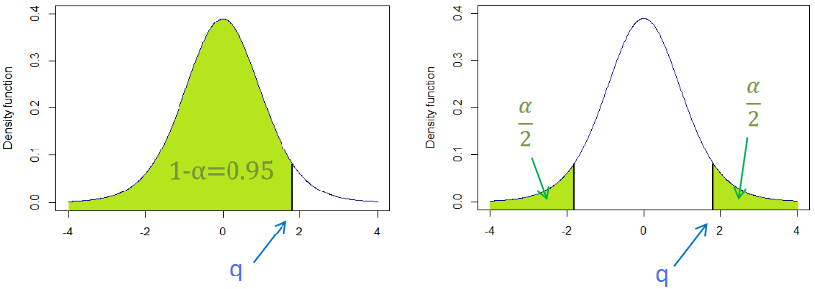

How to compute $q_{\frac{\alpha}{2}}$? 
- We first fix a value for $1 - \alpha$ (e.g., $0.95$)
- We then compute the value for $\frac{\alpha}{2}$ (e.g., $1 - \alpha = 0.95 \rightarrow \alpha = 1 + 0.95 \rightarrow \frac{\alpha}{2} = \frac{1+ 0.95}{2}$)
- We finally compute the value $q_{\frac{\alpha}{2}}$ using the **percent point function** (ppf) (inverse of the comulative probability function, cdf) or tabular values.

A 95% confidence interval is defined as **a range of values such that with $1 - \alpha = 95$% probability, the range will contain the true unknown value of the parameter**



In [15]:
from scipy.stats import t

deg = n-2
confidence = 0.95
value = t.ppf((1 + confidence) / 2., deg)

# Compute the population regression line
beta_hat_0, beta_hat_1 = least_squares(X, y)

# Compute the confidence interval for \beta_0
left_beta0 = beta_hat_0 - value * np.sqrt(se2_beta_0)
right_beta0 = beta_hat_0 + value * np.sqrt(se2_beta_0)

# Compute the confidence interval for \beta_1
left_beta1 = beta_hat_1 - value * np.sqrt(se2_beta_1)
right_beta1 = beta_hat_1 + value * np.sqrt(se2_beta_1)

print("The interval [{0:.3f}, {1:.3f}] contains the true beta_0 with {2}% probability".
     format(left_beta0, right_beta0, 100*confidence))
print("The interval [{0:.3f}, {1:.3f}] contains the true beta_1 with {2}% probability".
     format(left_beta1, right_beta1, 100*confidence))

The interval [6.130, 7.935] contains the true beta_0 with 95.0% probability
The interval [0.042, 0.053] contains the true beta_1 with 95.0% probability


## Hypothesis tests on the coefficients

We can use a similar approach to test if a variable depend from another one by setting up the following statistical test:
- $\mathcal{H}_0$: there is **no relationship** between $Y$ and $X$ 
- $\mathcal{H}_a$: there is **some relationship** between $Y$ and $X$ 

If we want to know if there is *statistical evidence* that the observation $Y$ depends on a specific variable $X$ (provided that $Y = f(X) + \epsilon = \beta_0 + \beta_1 X + \epsilon$), we can test whether $\beta_1$ is equal or not to $0$, i.e., 
- $\mathcal{H}_0$: $\beta_1 = 0$ 
- $\mathcal{H}_a$: $\beta_1 \ne 0$ 

#### How do we test if the null hypotesis $\mathcal{H}_0$ is verified? 
We take a sample (i.e., train a regressor in our case) and compute statistics for that sample. Than, fixed a significance level $\alpha$, assuming $\mathcal{H}_0$ is true, we compute *what is the probability of getting a sample with the statistics that we observed*. If that probability is lower that the significance level, then we reject $\mathcal{H}_0$ and say that we have evidence for the alternative.

In practice this translates into:
1. Fix $\alpha$ equal to a small value (0.05, 0.01, 0.005, 0.001)
2. Compute the statistics $\hat{t}=\frac{\hat{\beta}_{i}-\beta_i}{\operatorname{SE}(\hat{\beta}_{1})}$ under the null hypothesis $\rightarrow$ $\mathcal{H}_0$: $\beta_i = 0$ $\rightarrow$ $\hat{t}=\frac{\hat{\beta}_{i}-0}{\operatorname{SE}(\hat{\beta}_{1})}$
3. Compute the probability (p-value), under $\mathcal{H}_0$, of getting a sample with the statistics that we observed (or a more extreme value): 
    - (one-tailed test): $p = P(t \ge \hat{t} \mid \mathcal{H}_0)$ $\rightarrow$ $1 - P(t < \hat{t} \mid \mathcal{H}_0) = 1 - cdf(\hat{t}) = ppf(\hat{t})$
    - (two-tailed test): $p = P(t \ge \hat{t} \hspace{0.25em}\text{or}\hspace{0.25em} t \le -\hat{t} \mid \mathcal{H}_0)$ $\rightarrow$ $2 \cdot (1 - cdf(\hat{t})) = 2 \cdot ppf(\hat{t})$ <br><br>
    
4. 
    - If $p < \alpha$ $\rightarrow$ Reject $\mathcal{H}_0$ and say that we have evidence for the alternative $\mathcal{H}_a$ (there exists some relationship between $X$ and $y$)
    - If $p \ge \alpha$ $\rightarrow$ Do not reject $\mathcal{H}_0$ (we have no evidence to say that there exists some relationship between $X$ and $y$)


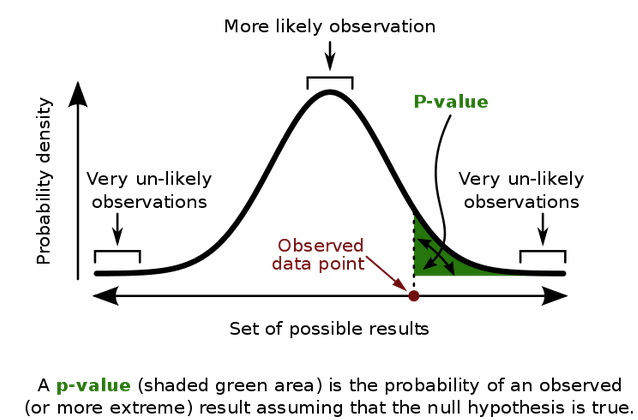

In [16]:
# Set alpha small
alpha = 0.0001
# Compute the t-statistic  under H0
t_stat = (beta_hat_1 - 0) / np.sqrt(se2_beta_1)
# Compute the p-value
# Note: t.sf(...) = 1 - t.cdf(...)
p_val = 2*t.sf(np.abs(t_stat), deg)

# Compare the p-vale with alpha
print("beta1 (TV)  t-statistic {0:.2f}, p-value {1}".format(t_stat, p_val))
if p_val < alpha:
    print("Reject H0: A relation between X and y exists")
else:
    print("Not Reject H0: A relation between X and y DOEST NOT exist")

beta1 (TV)  t-statistic 17.67, p-value 1.4673897001947178e-42
Reject H0: A relation between X and y exists


In [17]:
# Do the same for beta0 (intercept)
t_stat = (beta_hat_0 - 0) / np.sqrt(se2_beta_0)
p_val = 2*t.sf(np.abs(t_stat), deg)

# Compare the p-vale with alpha
print("beta0 (intercept)  t-statistic {0:.2f}, p-value {1}".format(t_stat, p_val))

beta0 (intercept)  t-statistic 15.36, p-value 1.4063004765084494e-35


## Multiple Linear Regression

Similarly to the simple linear regression setting, we want to find the values for the models parameters that minimize the residual sum of squares. We consider the following model:

$\hat{y}=\hat{\beta}_{0}+\hat{\beta}_{1} x_{1}+\hat{\beta}_{2} x_{2}+\cdots+\hat{\beta}_{p} x_{p}$

The Least Squares solution to the problem, in matrix form, is:

$\hat{\beta}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{y} \quad\quad$  with $X$ a $N \times (p+1)$ matrix, $y$ a $N \times 1$ vector

$\hat{\mathbf{y}}=\mathbf{X} \hat{\beta}=\mathbf{X}\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{y} \quad\quad$  with $\hat{y}$ the predicted value for each sample

In [18]:
# Select the sample features we want to use
X = adv_data[['TV', 'Radio', 'Newspaper']].to_numpy()
y = adv_data[['Sales']].to_numpy()

# X must be a N x (p+1) matrix representing having in each row (sample)
# a '1' followed by the samples features
X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
print(X[:10])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]
 [  1.    8.7  48.9  75. ]
 [  1.   57.5  32.8  23.5]
 [  1.  120.2  19.6  11.6]
 [  1.    8.6   2.1   1. ]
 [  1.  199.8   2.6  21.2]]


In [19]:
# Compute the estimates in matrix form
betas = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T).dot(y)
for i, beta in enumerate(betas[:, 0]):
    print("beta{} = {}".format(i, beta))

beta0 = 2.9388893694593863
beta1 = 0.045764645455397615
beta2 = 0.18853001691820387
beta3 = -0.0010374930424758566


In [20]:
# Let's create a function tahth performs these
# two operations combined
def multiple_least_squares(X, y):
    X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    betas = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T).dot(y)
    # Returns the predictions for convenience
    pred = X.dot(betas).reshape(-1)
    return betas, pred

In the Multiple Linear Regression case, the equation for computing the SE is a little bit different:

$\operatorname{SE}\left(\hat{\beta}\right)^{2}=\sigma^{2} \cdot diag\left((X^TX)^{-1}\right)
\quad\quad
\sigma^2= Var(\epsilon) \approx RSE^2$

In [22]:
# Computes coefficient statistcs
def show_stats(X, y, betas, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    # If the ones column has not been added
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    
    # Compute the prediction
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE2 = ((y-pred)**2).sum()/(n_samples - n_features)

    # Compute the t statistics
    se2_b = RSE2*(np.linalg.inv(np.dot(X.T, X)).diagonal())
    se_b = np.sqrt(se2_b)
    t_stat_b = (betas - 0) / se_b

    # Compute the p-value
    p_values =[2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b]
    
    # Print values
    se_b = np.round(se_b,4)
    t_stat_b = np.round(t_stat_b,2)
    p_values = np.round(p_values,4)
    betas = np.round(betas,3)
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    print(df)
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    TSS = np.sum((y - np.mean(y))**2)
    R_2 = 1 - (RSS/TSS)
    print("RSS: {}".format(RSS))
    print("MSE: {}".format(MSE))
    print("TSS: {}".format(TSS))
    print("R_2: {}".format(R_2))
    
show_stats(X, y, betas, ['Intercept', 'TV', 'Radio', 'Newspaper'], alpha)

        Name  Coefficients  Standard Errors  t-stat  p-value  reject H0
0  Intercept         2.939           0.3119    9.42   0.0000       True
1         TV         0.046           0.0014   32.81   0.0000       True
2      Radio         0.189           0.0086   21.89   0.0000       True
3  Newspaper        -0.001           0.0059   -0.18   0.8599      False
RSS: 556.8252629021872
MSE: 2.784126314510936
TSS: 5417.14875
R_2: 0.8972106381789522


By performing t-tests on the coefficients, separately, we can conclude that:
 - We must reject the hypothesis that the observation is not correlated with either TV or Radio features, but,
 - We cannot say the same for Newspaper.

**Notice** that in the multiple linear regression case, a **t-test performed on each variable reports the *partial* effect of adding that variable to a model that uses all features but the considered one**. So not rejecting the null hypothesis on Newspaper means that, *in the presence of TV and Radio*, there is no evidence that Newspaper is associated with the Sales observation.

In [23]:
y = adv_data[['Sales']].to_numpy()
for var in ['TV', 'Radio', 'Newspaper']:
    X = adv_data[[var]].to_numpy()
    betas, _ = multiple_least_squares(X, y)
    print("\n Linear Regression using {}".format(var))
    show_stats(X, y, betas, ['Intercept', var], alpha)
    


 Linear Regression using TV
        Name  Coefficients  Standard Errors  t-stat  p-value  reject H0
0  Intercept         7.033           0.4567   15.40      0.0       True
1         TV         0.048           0.0027   17.71      0.0       True
RSS: 2102.530583131351
MSE: 10.512652915656753
TSS: 5417.14875
R_2: 0.6118750508500712

 Linear Regression using Radio
        Name  Coefficients  Standard Errors  t-stat  p-value  reject H0
0  Intercept         9.312           0.5615   16.58      0.0       True
1      Radio         0.202           0.0204    9.95      0.0       True
RSS: 3618.479549025088
MSE: 18.09239774512544
TSS: 5417.14875
R_2: 0.33203245544529525

 Linear Regression using Newspaper
        Name  Coefficients  Standard Errors  t-stat  p-value  reject H0
0  Intercept        12.351           0.6199   19.93   0.0000       True
1  Newspaper         0.055           0.0165    3.31   0.0011      False
RSS: 5134.80454411194
MSE: 25.6740227205597
TSS: 5417.14875
R_2: 0.05212044544430

In the simple regression case where we only use the Newspaper feature, the
slope term represents the average effect of a 1,000€ increase in newspaper advertising, ignoring other predictors such as TV and radio. An additional 1,000€ on newspaper advertising leads to an increase in sales by approximately 55 units.

In contrast, in the multiple regression setting, the coefficient for newspaper represents the average effect of increasing newspaper spending by 1,000€ **while holding TV and radio fixed**.

Since we found out that the newspaper market is not actually correlated with sales, **we can remove it from the multiple regression setting.**

In [25]:
X = adv_data[['TV', 'Radio']].to_numpy()
betas, _ = multiple_least_squares(X, y)
show_stats(X, y, betas, ['Intercept', 'TV', 'Radio'], alpha)

        Name  Coefficients  Standard Errors  t-stat  p-value  reject H0
0  Intercept         2.921           0.2937    9.94      0.0       True
1         TV         0.046           0.0014   32.99      0.0       True
2      Radio         0.188           0.0080   23.44      0.0       True
RSS: 556.9139800676184
MSE: 2.784569900338092
TSS: 5417.14875
R_2: 0.8971942610828956


So we can see that when after removing Newspapaer the result of MSE and R_2 are the same. So we can proof that Newspaper are not so important in our model

## Hypothesis tests on subsets of coefficients

In the previous analysis we studied separately the impact of adding each feature to the prediction, meaning that we tested if there is evidence that a feature is correlated with the observation. 

How can we study the **combine effect** of multiple features?

For instance, can we say that in the model making use of all features, at **least one feature** is useful in predicting the rensponse? Looking at each t-test we may conclude that, since at least one of the p-values is under the threshold, we can conclude that yes, at least one feature is correlated (actually both TV and Radio).

However, we have to remenber that the tests we perform are **statistical tests**, and therefore that the observation we observe is only due to chance. As we compare more and more variables together with t-tests, we are actually increasing this probability. 

**What is the actual probability of making an error by comparing three variables with t-tests?**

In [26]:
alpha = 0.05

print("P(making a mistake) =", alpha)
print("P(not making a mistake) =", 1 - alpha)
print("P(not making any mistake) =", (1 - alpha)**3) # probability of multiple feature
print("P(making at least one mistake) =", 1 - ((1 - alpha)**3))

P(making a mistake) = 0.05
P(not making a mistake) = 0.95
P(not making any mistake) = 0.8573749999999999
P(making at least one mistake) = 0.1426250000000001


Which is is much greater that $\alpha$!

**What about 100 variables?**

In [27]:
print("P(not making any mistake) =", (1 - alpha)**100) # if we have many features may lead to missinterpret
print("P(making at least one mistake) =", 1 - ((1 - alpha)**100))

P(not making any mistake) = 0.0059205292203339975
P(making at least one mistake) = 0.994079470779666


Which means that with 100 input features, we are almost certain to see at least a correlation only due to chance!


### How to reliably test multiple features? 

F-tests are designed specifically for this situation, and they not suffer from the problem we observed on t-tests.
We generally use the F-test in two ways:
1. Checking if **all** the regression parameters are zero.
2. Checking if **a subset of the parameters** is zero.

#### 1- Are all parameters zero?

- $\mathcal{H}_0: \beta_1 = \beta_2 = ... = \beta_p = 0$
- $\mathcal{H}_a:$ at least one $\beta_j$ is non-zero

We proceed as the t-test, but this time we compute for our test the F-statistic $F = \frac{(TSS - RSS) / p}{RSS/(n-p-1)}$, 

where $TSS = \sum{(y_i - \overline{y})^2}$, $RSS = \sum{(y_i - \hat{y}_i)^2}$, $n$ is the number of training sample and $p$ the number of model paramentes. Being the ration between two Chi-squared distributions of parameters $p$ and $n-p-1$, respectively, we know that $F$ is distributed as a **Fisher distribution** of parameters $p$ and $n-p-1$.

We can perform the same steps as the t-test, but this time considering the Fisher distribution instead on the t-Student:
1. Fix $\alpha$ equal to a small value (0.05, 0.01, 0.005, 0.001)
2. Compute the statistics under the null hypothesis $\rightarrow \hat{F}$
3. Compute the probability (p-value), under $\mathcal{H}_0$, of getting a sample with the statistics that we observed (or a more extreme value):<br>
    $p = P(F \ge \hat{F} \mid \mathcal{H}_0)$ $\rightarrow$ $1 - P(t < \hat{F} \mid \mathcal{H}_0) = 1 - cdf(\hat{F}) = ppf(\hat{F})$
4. 
    - If $p < \alpha$ $\rightarrow$ Reject $\mathcal{H}_0$ and say that we have evidence for the alternative $\mathcal{H}_a$ (at least one parameter is different from 0)
    - If $p \ge \alpha$ $\rightarrow$ Do not reject $\mathcal{H}_0$

In [28]:
from scipy.stats import f

def rss(y_true, y_pred):
    # First we make sure the shapes are the same
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

def tss(y):
    return np.sum((y - y.mean()) ** 2)

In [29]:
# Train the complete model
X_complete = adv_data[['TV', 'Radio', 'Newspaper']].to_numpy()
betas_complete, y_pred = multiple_least_squares(X_complete, y)

n = X.shape[0]
nf_complete = X_complete.shape[1]
# Compute RSS ans TSS
rss_complete = rss(y, y_pred)
tss_y = tss(y)

# Compute the F statistics
F_num = (tss_y - rss_complete) / nf_complete
F_den = rss_complete / (n - nf_complete - 1)
F = F_num / F_den

# Compute the p-value
alpha = 0.005
p_value = f.sf(F, nf_complete, n - nf_complete - 1)

print("F-stat: ", F)
print("p-value: ", p_value)
if p_value < alpha:
    print("Reject H0: At least one coefficient is different from 0")
else:
    print("Accept H0: No evidence to say that at least one coefficient is different from 0")

F-stat:  570.2707036590942
p-value:  1.575227256092437e-96
Reject H0: At least one coefficient is different from 0


#### 2. Are a subset of the parameters zero?

The test is very similar to the previous one, but, again, we have to use a different statistics!

In this tests we distinguish between two models:
- The **complete** model, which is the one in which *all features* are used for prediction
- The **restricted** model, which is the one using *all the variables except $q$ features*

The test translates into:

- $\mathcal{H}_0: \beta_j = ... = 0$ with $\beta_j \in S$
- $\mathcal{H}_a:$ at least one $\beta_j$ is non-zero

$F = \frac{(RSS_r - RSS_c)/q}{RSS_c/(n-p-1)}$

The test we have to do to perform the test are always the same, however, this time F is distributed as a Fisher distribution of paramenters $q$ and $n-p-1$!



In [31]:
def Ftest_restricted(data, y, subset_features):
    # Train the complete model
    X_complete = data.to_numpy()
    y = y.to_numpy()
    n = X_complete.shape[0]
    betas_complete, y_pred = multiple_least_squares(X_complete, y)
    
    rss_complete = rss(y, y_pred)
    nf_complete = X_complete.shape[1]
    
    # Train the restricted model
    notS = data.columns.difference(subset_features)
    X_restr = data[notS].to_numpy()
    betas_restr, y_pred = multiple_least_squares(X_restr, y)

    rss_restr = rss(y, y_pred)
    nf_restr = X_restr.shape[1]

    q = nf_complete - nf_restr

    # Compute F statistics
    F_num = (rss_restr - rss_complete) / q
    F_den = rss_complete / (n - nf_complete - 1)
    F = F_num / F_den

    # Compute the p-value
    p_value = f.sf(F, q, n - nf_complete - 1)
    return p_value, F

Let's first consider subset containing a single variable at a time, that is, we want to know the partial effect of introducing each one of the variables in our model.

In [32]:
def Ftest_all(X, y, subsets, alpha):
    p_values, F_stats, t_stats = [], [], []
    for S in subsets:
        # Perform the test on the 'feature' variable
        p_value, F_value = Ftest_restricted(X, y, S)
        p_values.append(p_value)
        F_stats.append(F_value)
        # Note: we can compute the t-statistics starting from 
        # the F-statistics (actually only its absolute value),
        # but the opposite is true!
        t_stats.append(np.sqrt(np.abs(F_value)))

    F_stats = np.round(np.array(F_stats),2)
    t_stats = np.round(np.array(t_stats),2)
    p_values = np.round(np.array(p_values),4)
    H0reject = p_values < alpha

    df = pd.DataFrame()
    df["S"] = ["".join([n+" + " for n in subset])[:-3] for subset in subsets]
    df["|t-stat|"] = t_stats
    df["F-stat"] = F_stats
    df["p-value (F-stat)"] = p_values
    df["Reject H0 (F-stat)"] = H0reject
    print(df)

In [33]:
X = adv_data[['TV', 'Radio', 'Newspaper']]
y = adv_data[['Sales']]

Ftest_all(X, y, [['TV'], ['Radio'], ['Newspaper']], alpha=0.0001)

           S  |t-stat|   F-stat  p-value (F-stat)  Reject H0 (F-stat)
0         TV     32.81  1076.41            0.0000                True
1      Radio     21.89   479.33            0.0000                True
2  Newspaper      0.18     0.03            0.8599               False


As we may expect, performing an F-test on each variable independently provides us the same conclusions as those we obtained with t-tests. Testing just one variable $j$, indeed, means: *In the presence of the other variables, is the $\beta_j$ parameter equal to $0$?*, which is exacly what the t-test tests.

As a conseguence, there is a relationship between the t-statistic and the F-statistic, specifically: $F = t^2$

Let's try to consider pairs of features. **What we espect the test will return on pairs containing Newspaper?**

In [34]:
import itertools
Spairs = list(itertools.combinations(['TV', 'Radio', 'Newspaper'], r=2))
Ftest_all(X, y, Spairs, alpha=0.0001)

                   S  |t-stat|  F-stat  p-value (F-stat)  Reject H0 (F-stat)
0         TV + Radio     28.39  805.71               0.0                True
1     TV + Newspaper     23.21  538.84               0.0                True
2  Radio + Newspaper     16.49  272.04               0.0                True


**Note:** Some of the test we performed in this lecture can also be performed using the statsmodel package, with however less control on the underlying testing procedure. Here you can see t-tests and F-test performed on the same example. 

In [36]:
import statsmodels.api as sm

X_complete_intercept = np.concatenate([np.ones([X_complete.shape[0], 1]), X_complete], axis=-1)
ols_model = sm.OLS(y.to_numpy().reshape(-1),X_complete_intercept)
ols_results = ols_model.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        19:18:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""